In [2]:
import pandas

In [3]:
df_confirmed = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', infer_datetime_format=True, parse_dates=True)

In [4]:
#print(df_confirmed)
df_confirmed_nocoords = df_confirmed.drop(columns=['Lat', 'Long'])
#print(df_confirmed_nocoords)
#print(df_confirmed_nocoords.columns)
#print(df_confirmed_nocoords[["Country/Region", "Province/State"]])
country_columns = pandas.MultiIndex.from_frame(df_confirmed_nocoords[["Country/Region", "Province/State"]])
#print(country_columns)
df_confirmed_nocoords_nocountry = df_confirmed_nocoords.drop(columns=["Country/Region", "Province/State"])
#print(df_confirmed_nocoords_nocountry)
df_confirmed_nocoords_nocountry_transp = df_confirmed_nocoords_nocountry.T
#print(df_confirmed_nocoords_nocountry_transp)
df_confirmed_nocoords_nocountry_transp.columns = country_columns
#print(df_confirmed_nocoords_nocountry_transp)
df_confirmed_nocoords_nocountry_transp.index.rename("Date", inplace=True)
df_confirmed_nocoords_nocountry_transp.index = pandas.to_datetime(df_confirmed_nocoords_nocountry_transp.index)
#print(df_confirmed_nocoords_nocountry_transp.index)
#print(df_confirmed_nocoords_nocountry_transp.columns)
df_confirmed_nocoords_nocountry_transp.describe()

Country/Region Mainland China                                                  \
Province/State          Anhui     Beijing   Chongqing      Fujian       Gansu   
count               45.000000   45.000000   45.000000   45.000000   45.000000   
mean               684.822222  292.955556  419.222222  218.800000   68.155556   
std                373.685228  136.317970  195.168679  100.262519   33.394308   
min                  1.000000   14.000000    6.000000    1.000000    0.000000   
25%                340.000000  191.000000  300.000000  159.000000   51.000000   
50%                910.000000  366.000000  529.000000  279.000000   90.000000   
75%                989.000000  399.000000  576.000000  293.000000   91.000000   
max                990.000000  422.000000  576.000000  296.000000  119.000000   

Country/Region                                                               \
Province/State    Guangdong     Guangxi     Guizhou      Hainan       Hebei   
count             45.000000   45.000000   45.000000   45.000000   45.000000   
mean             971.866667  179.044444   96.933333  119.733333  208.111111   
std              480.223745   85.724706   58.257032   58.729890  118.670327   
min               26.000000    2.000000    1.000000    4.000000    1.000000   
25%              632.000000  111.000000   38.000000   64.000000  104.000000   
50%             1241.000000  222.000000  135.000000  157.000000  265.000000   
75%             1345.000000  251.000000  146.000000  168.000000  311.000000   
max             1352.000000  252.000000  146.000000  168.000000  318.000000   

Country/Region  ...               US                                         \
Province/State  ... Floyd County, GA Marion County, IN Middlesex County, MA   
count           ...        45.000000         45.000000            45.000000   
mean            ...         0.022222          0.022222             0.022222   
std             ...         0.149071          0.149071             0.149071   
min             ...         0.000000          0.000000             0.000000   
25%             ...         0.000000          0.000000             0.000000   
50%             ...         0.000000          0.000000             0.000000   
75%             ...         0.000000          0.000000             0.000000   
max             ...         1.000000          1.000000             1.000000   

Country/Region                                                         \
Province/State Nassau County, NY Norwell County, MA Ramsey County, MN   
count                  45.000000          45.000000         45.000000   
mean                    0.044444           0.022222          0.022222   
std                     0.208409           0.149071          0.149071   
min                     0.000000           0.000000          0.000000   
25%                     0.000000           0.000000          0.000000   
50%                     0.000000           0.000000          0.000000   
75%                     0.000000           0.000000          0.000000   
max                     1.000000           1.000000          1.000000   

Country/Region                                                    Vatican City  
Province/State Washoe County, NV Wayne County, PA Yolo County, CA          NaN  
count                  45.000000        45.000000       45.000000    45.000000  
mean                    0.022222         0.022222        0.022222     0.022222  
std                     0.149071         0.149071        0.149071     0.149071  
min                     0.000000         0.000000        0.000000     0.000000  
25%                     0.000000         0.000000        0.000000     0.000000  
50%                     0.000000         0.000000        0.000000     0.000000  
75%                     0.000000         0.000000        0.000000     0.000000  
max                     1.000000         1.000000        1.000000     1.000000  

[8 rows x 199 columns]

In [5]:
at = 'Austria'
at_neighbours = [at, 'Germany', 'Italy', 'Czech Republic', 'Hungary', 'Slovenia', 'Slovakia', ] #+ 'Lichtenstein'
at_nationalities = [at, 'Germany', 'Hungary', 'Croatia', 'Romania', 'Bosnia and Herzegovina', 'Serbia', ] #+ 'Syria', 'Turkey'
at_travel_incomming = [at, 'Germany', 'Italy', 'Czech Republic', 'Switzerland', 'UK', 'Netherlands', ] #+ 'Lichtenstein'
at_travel_outgoing = [at, 'Germany', 'Italy', 'Switzerland', 'Croatia', 'Greece', 'Spain' ]

df_confirmed_at = df_confirmed_nocoords_nocountry_transp[[at]]
df_confirmed_at.columns = df_confirmed_at.columns.droplevel(1)
#print(df_confirmed_at)

df_confirmed_at_neighbours = df_confirmed_nocoords_nocountry_transp[at_neighbours]
df_confirmed_at_neighbours.columns = df_confirmed_at_neighbours.columns.droplevel(1)
#print(df_confirmed_neighbours)

df_confirmed_at_nationalities = df_confirmed_nocoords_nocountry_transp[at_nationalities]
df_confirmed_at_nationalities.columns = df_confirmed_at_nationalities.columns.droplevel(1)
#print(df_confirmed_at_nationalities)

df_confirmed_at_travel_incomming = df_confirmed_nocoords_nocountry_transp[at_travel_incomming]
df_confirmed_at_travel_incomming.columns = df_confirmed_at_travel_incomming.columns.droplevel(1)
#print(df_confirmed_at_travel_incomming)

df_confirmed_at_travel_outgoing = df_confirmed_nocoords_nocountry_transp[at_travel_outgoing]
df_confirmed_at_travel_outgoing.columns = df_confirmed_at_travel_outgoing.columns.droplevel(1)
#rint(df_confirmed_at_travel_outgoing)

In [6]:
#df_confirmed_at_pred = df_confirmed_at.copy()
first_date = df_confirmed_at.index[0]
future_days = 14
column_name_prediction = 'Prediction'
first_date_future = pandas.date_range(first_date, periods=len(df_confirmed_at.index)+future_days, freq='D')
#print(first_date_future)
df_prediction_times1_4 = pandas.DataFrame({column_name_prediction: pandas.Series(0, index=first_date_future)})
#print(df_prediction_times1_4)
df_confirmed_at_pred = pandas.concat([df_confirmed_at,df_prediction_times1_4], axis=1)
df_confirmed_at_pred.fillna(0, inplace=True)
#print(df_confirmed_at_pred)
start_infection_index = df_confirmed_at_pred[at].gt(0).idxmax()
#print(start_infection_loc)
#initialize with same value as infection
start_infection_value = df_confirmed_at_pred.loc[start_infection_index, at]
days_from_start_infection = len(df_confirmed_at_pred.loc[start_infection_index:])

def prev_times1_4(prev_value, n):
    if not isinstance(prev_value, list):
        prev_value = [prev_value]
    if n == 0: return []
    if n == 1: return prev_value
    elif n == 2: return prev_value+[prev_value[-1] * 1.4]
    else: return prev_times1_4(prev_value+[prev_value[-1] * 1.4], n - 1)

#print(prev_times1_4(1,2))
#print(prev_times1_4(1,5))
#print(prev_times1_4(2,5))

# fill with predicted values
df_confirmed_at_pred.loc[start_infection_index:, column_name_prediction] = prev_times1_4(start_infection_value, days_from_start_infection)
#print(df_confirmed_at_pred)
#print(df_confirmed_at_pred[start_infection_loc:])

latest_data_date = df_confirmed_at.index[-1]

In [7]:
directory = "export/"
file_prefix = directory+latest_data_date.strftime("%Y-%m-%d")+"_confirmed"

df_confirmed_at_pred_title = "Infections Austria and Predictions"
df_confirmed_at_neighbours_title = "Neighbouring contries"
df_confirmed_at_nationalities_title = "Nationalities in Austria"
df_confirmed_at_travel_incomming_title = "Most Visiting Nationalities"
df_confirmed_at_travel_outgoing_title = "Most Visited Countries"

df_confirmed_at_pred.to_csv(file_prefix+"_"+df_confirmed_at_pred_title)
df_confirmed_at_neighbours.to_csv(file_prefix+"_"+df_confirmed_at_neighbours_title)
df_confirmed_at_nationalities.to_csv(file_prefix+"_"+df_confirmed_at_nationalities_title)
df_confirmed_at_travel_incomming.to_csv(file_prefix+"_"+df_confirmed_at_travel_incomming_title)
df_confirmed_at_travel_outgoing.to_csv(file_prefix+"_"+df_confirmed_at_travel_outgoing_title)

/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/mario/.local/lib/python3.7/site-packages/pandas

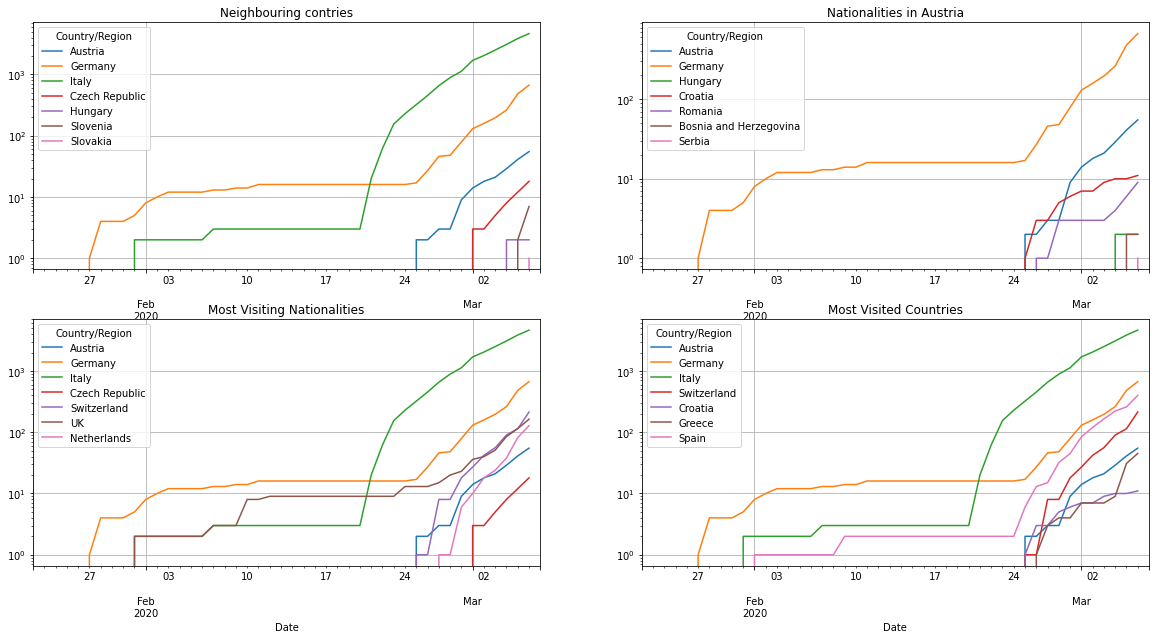

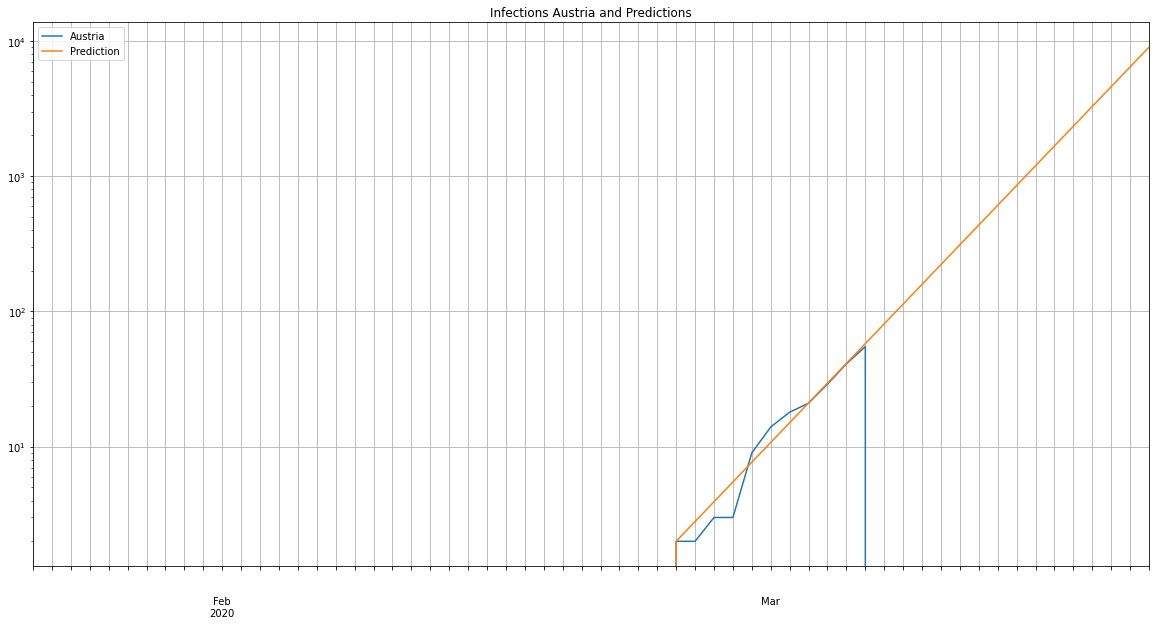

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)

fig, axes = plt.subplots(nrows=2, ncols=2)

df_confirmed_at_pred.plot(figsize=(20, 10), logy=True, xticks=df_confirmed_at_pred.index.values, title=df_confirmed_at_pred_title)
plt.grid(b=True, which='major', linestyle='-')
plt.savefig(file_prefix+"_"+plt.gca().get_title())

df_confirmed_at_neighbours.plot(ax=axes[0, 0], logy=True, title=df_confirmed_at_neighbours_title)
axes[0, 0].grid(b=True, which='major', linestyle='-')
df_confirmed_at_nationalities.plot(ax=axes[0, 1], logy=True, title=df_confirmed_at_nationalities_title)
axes[0, 1].grid(b=True, which='major', linestyle='-')
df_confirmed_at_travel_incomming.plot(ax=axes[1, 0], logy=True, title=df_confirmed_at_travel_incomming_title)
axes[1, 0].grid(b=True, which='major', linestyle='-')
df_confirmed_at_travel_outgoing.plot(ax=axes[1, 1], logy=True, title=df_confirmed_at_travel_outgoing_title)
axes[1, 1].grid(b=True, which='major', linestyle='-')
fig.savefig(file_prefix+"_Comparison of Infections")